In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
%load_ext tensorboard

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [5]:
X_train_full.shape, y_train_full.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.1)

In [7]:
X_train.shape, X_valid.shape

((45000, 32, 32, 3), (5000, 32, 32, 3))

In [8]:
import os
if "ANN" in os.path.abspath(os.curdir): os.chdir("..")
BASE_DIR = os.path.abspath(os.curdir)
BASE_DIR

'D:\\TheCompleteML\\projects'

In [9]:
if "ANN" not in os.path.abspath(os.curdir): 
    os.chdir(os.path.abspath(os.path.join(os.curdir, "ANN")))

In [10]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [48]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for i in range(20):
    model.add(keras.layers.Dense(100, 
                                kernel_initializer=keras.initializers.he_normal, 
                                activation=keras.activations.elu))
model.add(keras.layers.Dense(10, activation="softmax"))

#### Learning Rate Estimations

In [49]:
run_index = 3 # increment this at every run
learning_rate = 2e-5

logdir = os.path.join(BASE_DIR, "logs", "dnn_cifar10_logs")
run_logdir = os.path.join(logdir, "run_{:03d}".format(run_index))
model_path = os.path.join(BASE_DIR, "models", f"{'cifar10_' + str(learning_rate)[2:]}")

model_checkpoint_cb = keras.callbacks.ModelCheckpoint(model_path, save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=20)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [50]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, 
             optimizer=keras.optimizers.Nadam(learning_rate=learning_rate), 
             metrics=keras.metrics.sparse_categorical_accuracy)

In [51]:
callbacks = [model_checkpoint_cb, early_stopping, tensorboard_cb]

In [40]:
# # 3e-3
# history = model.fit(X_train, y_train, epochs=10, 
#                     validation_data=(X_valid, y_valid),
#                     callbacks=callbacks)

Epoch 1/10
1407/1407 [==============================] - 16s 9ms/step - loss: 6.4350 - sparse_categorical_accuracy: 0.2238 - val_loss: 2.3675 - val_sparse_categorical_accuracy: 0.1874
Epoch 2/10
1407/1407 [==============================] - 12s 9ms/step - loss: 2.1497 - sparse_categorical_accuracy: 0.1786 - val_loss: 2.1194 - val_sparse_categorical_accuracy: 0.1678
Epoch 3/10
1407/1407 [==============================] - 13s 9ms/step - loss: 2.0847 - sparse_categorical_accuracy: 0.1827 - val_loss: 2.0670 - val_sparse_categorical_accuracy: 0.2074
Epoch 4/10
1407/1407 [==============================] - 10s 7ms/step - loss: 2.0788 - sparse_categorical_accuracy: 0.1863 - val_loss: 2.0909 - val_sparse_categorical_accuracy: 0.1704
Epoch 5/10
1407/1407 [==============================] - 10s 7ms/step - loss: 2.1571 - sparse_categorical_accuracy: 0.1600 - val_loss: 2.1824 - val_sparse_categorical_accuracy: 0.1544
Epoch 6/10
1407/1407 [==============================] - 10s 7ms/step - loss: 2.1054 -

In [46]:
# # 1e-4
# history = model.fit(X_train, y_train, epochs=10, 
#                     validation_data=(X_valid, y_valid),
#                     callbacks=callbacks)

Epoch 1/10
1407/1407 [==============================] - 16s 9ms/step - loss: 3.3919 - sparse_categorical_accuracy: 0.1924 - val_loss: 2.2258 - val_sparse_categorical_accuracy: 0.2120
Epoch 2/10
1407/1407 [==============================] - 13s 9ms/step - loss: 1.9891 - sparse_categorical_accuracy: 0.2744 - val_loss: 2.1193 - val_sparse_categorical_accuracy: 0.2464
Epoch 3/10
1407/1407 [==============================] - 13s 9ms/step - loss: 1.8888 - sparse_categorical_accuracy: 0.3119 - val_loss: 1.9566 - val_sparse_categorical_accuracy: 0.2984
Epoch 4/10
1407/1407 [==============================] - 11s 8ms/step - loss: 1.8120 - sparse_categorical_accuracy: 0.3404 - val_loss: 2.0654 - val_sparse_categorical_accuracy: 0.2614
Epoch 5/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.7658 - sparse_categorical_accuracy: 0.3589 - val_loss: 1.9702 - val_sparse_categorical_accuracy: 0.3074
Epoch 6/10
1407/1407 [==============================] - 13s 9ms/step - loss: 1.7138 -

In [52]:
# # 2e-5
# history = model.fit(X_train, y_train, epochs=10, 
#                     validation_data=(X_valid, y_valid),
#                     callbacks=callbacks)

Epoch 1/10
1407/1407 [==============================] - 16s 9ms/step - loss: 7.0371 - sparse_categorical_accuracy: 0.1250 - val_loss: 2.5228 - val_sparse_categorical_accuracy: 0.1766
Epoch 2/10
1407/1407 [==============================] - 12s 9ms/step - loss: 2.2991 - sparse_categorical_accuracy: 0.1876 - val_loss: 2.1739 - val_sparse_categorical_accuracy: 0.2006
Epoch 3/10
1407/1407 [==============================] - 12s 9ms/step - loss: 2.1059 - sparse_categorical_accuracy: 0.2290 - val_loss: 2.0708 - val_sparse_categorical_accuracy: 0.2282
Epoch 4/10
1407/1407 [==============================] - 13s 9ms/step - loss: 2.0131 - sparse_categorical_accuracy: 0.2612 - val_loss: 2.0115 - val_sparse_categorical_accuracy: 0.2508
Epoch 5/10
1407/1407 [==============================] - 13s 9ms/step - loss: 1.9338 - sparse_categorical_accuracy: 0.2888 - val_loss: 1.9357 - val_sparse_categorical_accuracy: 0.2848
Epoch 6/10
1407/1407 [==============================] - 13s 9ms/step - loss: 1.8666 -

##### Observations

Learning rate around 1e-4 performs well compare to others, we can also tune it further for more accuracy
Let's tune the model to 1e-4

In [56]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42) 

In [57]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for i in range(20):
    model.add(keras.layers.Dense(100, 
                                kernel_initializer=keras.initializers.he_normal, 
                                activation=keras.activations.elu))
model.add(keras.layers.Dense(10, activation="softmax"))

run_index = 4 # increment this at every run
learning_rate = 1e-4

logdir = os.path.join(BASE_DIR, "logs", "dnn_cifar10_logs")
run_logdir = os.path.join(logdir, "run_{:03d}".format(run_index))
model_path = os.path.join(BASE_DIR, "models", f"{'cifar10_' + str(learning_rate)[2:]}")

model_checkpoint_cb = keras.callbacks.ModelCheckpoint(model_path, save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=20)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

model.compile(loss=keras.losses.sparse_categorical_crossentropy, 
             optimizer=keras.optimizers.Nadam(learning_rate=learning_rate), 
             metrics=keras.metrics.sparse_categorical_accuracy)

callbacks = [model_checkpoint_cb, early_stopping, tensorboard_cb]

In [58]:
history = model.fit(X_train, y_train, epochs=100, 
                    validation_data=(X_valid, y_valid),
                    callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 15s 9ms/step - loss: 3.3919 - sparse_categorical_accuracy: 0.1924 - val_loss: 2.2258 - val_sparse_categorical_accuracy: 0.2120
Epoch 2/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.9891 - sparse_categorical_accuracy: 0.2744 - val_loss: 2.1193 - val_sparse_categorical_accuracy: 0.2464
Epoch 3/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.8888 - sparse_categorical_accuracy: 0.3119 - val_loss: 1.9566 - val_sparse_categorical_accuracy: 0.2984
Epoch 4/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.8120 - sparse_categorical_accuracy: 0.3404 - val_loss: 2.0654 - val_sparse_categorical_accuracy: 0.2614
Epoch 5/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.7658 - sparse_categorical_accuracy: 0.3589 - val_loss: 1.9702 - val_sparse_categorical_accuracy: 0.3074
Epoch 6/100
1407/1407 [==============================] - 12s 9ms/step - loss: 1.

In [61]:
model = keras.models.load_model(model_path)
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 1s 3ms/step - loss: 1.5295 - sparse_categorical_accuracy: 0.4706


[1.5294785499572754, 0.4706000089645386]

### Batch Normalizaions

In [80]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())

for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation(activation="elu"))

model.add(keras.layers.Dense(10, activation="softmax"))

learnig_rate = 5e-4 # we can fine tune on 10 to 20 epochs based on time
train_count = 1 # update on each train

logdir = os.path.join(BASE_DIR, "logs", "dnn_cifar10_logs")
run_logdir = os.path.join(logdir, "run_{:03d}".format(train_count))
model_path = os.path.join(BASE_DIR, "models", f"{'cifar10_batch_'+str(learning_rate)[2:]}")

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Nadam(learning_rate=learnig_rate),
              metrics=keras.metrics.sparse_categorical_accuracy)

modelcheckpoint_cb = keras.callbacks.ModelCheckpoint(model_path, save_best_only=True)
earlystoping_cb = keras.callbacks.EarlyStopping(patience=20)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)


callbacks = [model_checkpoint_cb, early_stopping, tensorboard_cb]

In [81]:
histroy = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 26s 12ms/step - loss: 1.8292 - sparse_categorical_accuracy: 0.3465 - val_loss: 1.6738 - val_sparse_categorical_accuracy: 0.3984
Epoch 2/100
1407/1407 [==============================] - 16s 12ms/step - loss: 1.6656 - sparse_categorical_accuracy: 0.4074 - val_loss: 1.6008 - val_sparse_categorical_accuracy: 0.4328
Epoch 3/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.5937 - sparse_categorical_accuracy: 0.4329 - val_loss: 1.5522 - val_sparse_categorical_accuracy: 0.4452
Epoch 4/100
1407/1407 [==============================] - 24s 17ms/step - loss: 1.5428 - sparse_categorical_accuracy: 0.4503 - val_loss: 1.5263 - val_sparse_categorical_accuracy: 0.4496
Epoch 5/100
1407/1407 [==============================] - 24s 17ms/step - loss: 1.5008 - sparse_categorical_accuracy: 0.4638 - val_loss: 1.5080 - val_sparse_categorical_accuracy: 0.4660
Epoch 6/100
1407/1407 [==============================] - 24s 17ms/step - lo

Epoch 34/100
1407/1407 [==============================] - 16s 12ms/step - loss: 1.0220 - sparse_categorical_accuracy: 0.6408 - val_loss: 1.3975 - val_sparse_categorical_accuracy: 0.5296
Epoch 35/100
1407/1407 [==============================] - 16s 12ms/step - loss: 1.0105 - sparse_categorical_accuracy: 0.6435 - val_loss: 1.4120 - val_sparse_categorical_accuracy: 0.5232
Epoch 36/100
1407/1407 [==============================] - 16s 12ms/step - loss: 1.0049 - sparse_categorical_accuracy: 0.6452 - val_loss: 1.4133 - val_sparse_categorical_accuracy: 0.5248
Epoch 37/100
1407/1407 [==============================] - 16s 12ms/step - loss: 0.9952 - sparse_categorical_accuracy: 0.6473 - val_loss: 1.4214 - val_sparse_categorical_accuracy: 0.5292
Epoch 38/100
1407/1407 [==============================] - 17s 12ms/step - loss: 0.9766 - sparse_categorical_accuracy: 0.6563 - val_loss: 1.4079 - val_sparse_categorical_accuracy: 0.5368
Epoch 39/100
1407/1407 [==============================] - 16s 12ms/ste

##### Observations
as due to batch normalization it takes more time per epoch but it converges much faster then the noramal method, 50% validations accuracy achieved in 12 epochs and same was in 60 epochs

### Implementing SELU as activations functions

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 1)).reshape(-1, 32, 32, 3)
X_valid_scaled = scaler.transform(X_valid.reshape(-1, 1)).reshape(-1, 32, 32, 3)
X_test_scaled = scaler.transform(X_test.reshape(-1, 1)).reshape(-1, 32, 32, 3)

In [12]:
X_train_scaled.shape

(45000, 32, 32, 3)

In [84]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [86]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 activation="selu",
                                 kernel_initializer=keras.initializers.lecun_normal))
model.add(keras.layers.Dense(10, activation="softmax"))

In [87]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
             optimizer=keras.optimizers.Nadam(learning_rate=7e-4), # we can tune for learning rate for 10 to 20 epochs
             metrics=keras.metrics.sparse_categorical_accuracy)

In [14]:
callbacks=[keras.callbacks.EarlyStopping(patience=20)]

In [88]:
history = model.fit(X_train_scaled, y_train_scaled, epochs=100, validation_data=(X_valid, y_valid), callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 14s 8ms/step - loss: 1.9222 - sparse_categorical_accuracy: 0.3138 - val_loss: 1.8392 - val_sparse_categorical_accuracy: 0.3484
Epoch 2/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.7126 - sparse_categorical_accuracy: 0.3942 - val_loss: 1.7876 - val_sparse_categorical_accuracy: 0.3696
Epoch 3/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6177 - sparse_categorical_accuracy: 0.4282 - val_loss: 1.6275 - val_sparse_categorical_accuracy: 0.4260
Epoch 4/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.5495 - sparse_categorical_accuracy: 0.4555 - val_loss: 1.6281 - val_sparse_categorical_accuracy: 0.4082
Epoch 5/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.4936 - sparse_categorical_accuracy: 0.4768 - val_loss: 1.6068 - val_sparse_categorical_accuracy: 0.4218
Epoch 6/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.

1407/1407 [==============================] - 10s 7ms/step - loss: 0.5613 - sparse_categorical_accuracy: 0.8126 - val_loss: 2.4398 - val_sparse_categorical_accuracy: 0.4898
Epoch 90/100
1407/1407 [==============================] - 11s 8ms/step - loss: 0.5697 - sparse_categorical_accuracy: 0.8130 - val_loss: 2.2557 - val_sparse_categorical_accuracy: 0.5010
Epoch 91/100
1407/1407 [==============================] - 11s 7ms/step - loss: 0.5698 - sparse_categorical_accuracy: 0.8124 - val_loss: 2.1950 - val_sparse_categorical_accuracy: 0.4948
Epoch 92/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2792 - sparse_categorical_accuracy: 0.7607 - val_loss: 1.9420 - val_sparse_categorical_accuracy: 0.4896
Epoch 93/100
1407/1407 [==============================] - 10s 7ms/step - loss: 0.6895 - sparse_categorical_accuracy: 0.7718 - val_loss: 1.9997 - val_sparse_categorical_accuracy: 0.4882
Epoch 94/100
1407/1407 [==============================] - 10s 7ms/step - loss: 0.6407 - 

In [19]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, 
                                activation="selu",
                                kernel_initializer="lecun_normal"))

model.add(keras.layers.AlphaDropout(0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

learnig_rate = 5e-4

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
             optimizer=keras.optimizers.Nadam(learning_rate=learnig_rate),
             metrics=keras.metrics.sparse_categorical_accuracy)              

In [21]:
callbacks = keras.callbacks.EarlyStopping(patience=20)

history = model.fit(X_train_scaled, y_train, epochs=100, 
                    validation_data=(X_valid_scaled, y_valid), callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 14s 7ms/step - loss: 1.8782 - sparse_categorical_accuracy: 0.3331 - val_loss: 1.7532 - val_sparse_categorical_accuracy: 0.3680
Epoch 2/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6598 - sparse_categorical_accuracy: 0.4125 - val_loss: 1.7109 - val_sparse_categorical_accuracy: 0.4134
Epoch 3/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.5745 - sparse_categorical_accuracy: 0.4436 - val_loss: 1.6270 - val_sparse_categorical_accuracy: 0.4342
Epoch 4/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.5056 - sparse_categorical_accuracy: 0.4737 - val_loss: 1.5985 - val_sparse_categorical_accuracy: 0.4482
Epoch 5/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.4499 - sparse_categorical_accuracy: 0.4920 - val_loss: 1.5411 - val_sparse_categorical_accuracy: 0.4626
Epoch 6/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.

In [70]:
model_path  = os.path.join(BASE_DIR, "dnn_with_dropout_with_selu.h5")

In [72]:
keras.models.save_model(model, model_path)

In [54]:
y_probas = np.stack([model(X_test_scaled, training=True) for sample in range(100)])

In [32]:
y_probas.shape

(100, 10000, 10)

In [55]:
y_proba = y_probas.mean(axis=0)

In [56]:
y_proba.shape

(10000, 10)

In [59]:
np.round(model.predict(X_test_scaled[:1]), 2)

array([[0.09, 0.01, 0.1 , 0.27, 0.16, 0.26, 0.02, 0.06, 0.02, 0.01]],
      dtype=float32)

In [52]:
np.round(y_probas[:, :1], 2).shape

(100, 1, 10)

In [53]:
np.round(y_prob[:1], 2)

array([[0.1 , 0.01, 0.11, 0.24, 0.16, 0.23, 0.03, 0.07, 0.03, 0.01]],
      dtype=float32)

In [65]:
for layer in model.layers:
    print(type(layer))

<class 'keras.layers.core.flatten.Flatten'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.noise.AlphaDropout'>
<class 'keras.layers.core.dense.Dense'>


#### Observations

here we get 51% accuracy which is good then without the dropout, we can do more tuning with learning rate and drop-out ratio

In [106]:
class MCDropouts(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [107]:
model = keras.models.load_model(model_path)

In [108]:
my_model = keras.models.Sequential([MCDropouts(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else \
                                layer for layer in model.layers])

In [109]:
my_model.set_weights(model.get_weights())

In [110]:
def find_dropout_probas(model, X, n_samples=10):
    y_probas = [model.predict(X) for sample in range(n_samples)]
    return np.mean(y_probas, axis=0)

def find_dropout_classes(model, X, n_samples=10):
    y_prob = find_dropout_probas(model, X, n_samples)
    return np.argmax(y_prob, axis=1)

In [111]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# y_probas = find_dropout_probas(my_model, X_test_scaled, 10)
y_pred = find_dropout_classes(my_model, X_valid_scaled, 10)

In [112]:
np.mean(y_valid[:, 0] == y_pred)

0.5124

##### Observations

here we get same accuracy as previous around 51.20 on validation set. Batch normalization has quite good accuracy.

In [120]:
np.log2(10)

3.321928094887362

In [180]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
        
    def on_batch_end(self, batch, logs):
        lr = K.get_value(self.model.optimizer.learning_rate)
        self.rates.append(lr)
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, lr*self.factor)
        
def find_learnig_rate(model, X, y, epochs=1, batch_size=32, min_rate=1e-5, max_rate=10):
    init_weights = model.get_weights()
    init_lr = K.get_value(model.optimizer.learning_rate)
    iterations = np.math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size, callbacks=[exp_lr])
    model.set_weights(init_weights)
    K.set_value(model.optimizer.learning_rate, init_lr)
    return exp_lr.rates, exp_lr.losses

def plot_rates_vs_losses(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [181]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [182]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
    
model.add(keras.layers.AlphaDropout(0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

learning_rate = 1e-3
model.compile(loss=keras.losses.sparse_categorical_crossentropy, 
             optimizer=keras.optimizers.SGD(learning_rate=learning_rate),
             metrics=["accuracy"])

352/352 [==============================] - 4s 9ms/step - loss: nan - accuracy: 0.1338


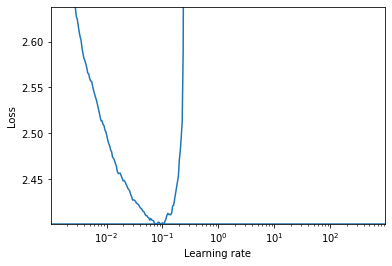

In [183]:
batch_size = 128
rates, losses = find_learnig_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_rates_vs_losses(rates, losses)

In [184]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(learning_rate=1e-2)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [185]:
n_epochs = 15
onecycle = OneCycleScheduler(math.ceil(len(X_train_scaled) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/15
352/352 [==============================] - 5s 10ms/step - loss: 2.0403 - accuracy: 0.2908 - val_loss: 1.8399 - val_accuracy: 0.3454
Epoch 2/15
352/352 [==============================] - 3s 9ms/step - loss: 1.7609 - accuracy: 0.3777 - val_loss: 1.6631 - val_accuracy: 0.4176
Epoch 3/15
352/352 [==============================] - 3s 9ms/step - loss: 1.6300 - accuracy: 0.4212 - val_loss: 1.6913 - val_accuracy: 0.4072
Epoch 4/15
352/352 [==============================] - 3s 9ms/step - loss: 1.5562 - accuracy: 0.4495 - val_loss: 1.6053 - val_accuracy: 0.4300
Epoch 5/15
352/352 [==============================] - 3s 9ms/step - loss: 1.5007 - accuracy: 0.4691 - val_loss: 1.6516 - val_accuracy: 0.4464
Epoch 6/15
352/352 [==============================] - 3s 9ms/step - loss: 1.4626 - accuracy: 0.4822 - val_loss: 1.6092 - val_accuracy: 0.4464
Epoch 7/15
352/352 [==============================] - 3s 9ms/step - loss: 1.4321 - accuracy: 0.4920 - val_loss: 1.6340 - val_accuracy: 0.4420
Epoch

One cycle allowed us to train the model in just 15 epochs, each taking only 2 seconds (thanks to the larger batch size). This is several times faster than the fastest model we trained so far. Moreover, we improved the model's performance (from 47.6% to 52.0%). The batch normalized model reaches a slightly better performance (54%), but it's much slower to train.